# Stock Market News Analysis

In [2]:
# Import Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\liulj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Import data 
stock_news = pd.read_csv(r"C:\Users\liulj\Desktop\KAIM\stock-market-data\raw_analyst_ratings.csv")
stock_news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Make a copy of stock news to make change on it

In [4]:
# Make Copy
sentimental_data = stock_news.copy()
sentimental_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Explatory Data Anaysis of Stock News Data

In [5]:
# Data Shape
sentimental_data.shape

(1407328, 6)

In [6]:
# Information 
sentimental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [7]:
# Check missing Value
sentimental_data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

### Descriptive Statistics

**Count Number of Publisher companies**
* To know which publisher publish more

In [8]:
publisher_counts = sentimental_data["publisher"].value_counts()
publisher_counts.head(10)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

**Visualize Publisher**

C:\Users\liulj\AppData\Local\Temp\ipykernel_22604\2906766915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publisher.values, y=top_publisher.index, palette="viridis")


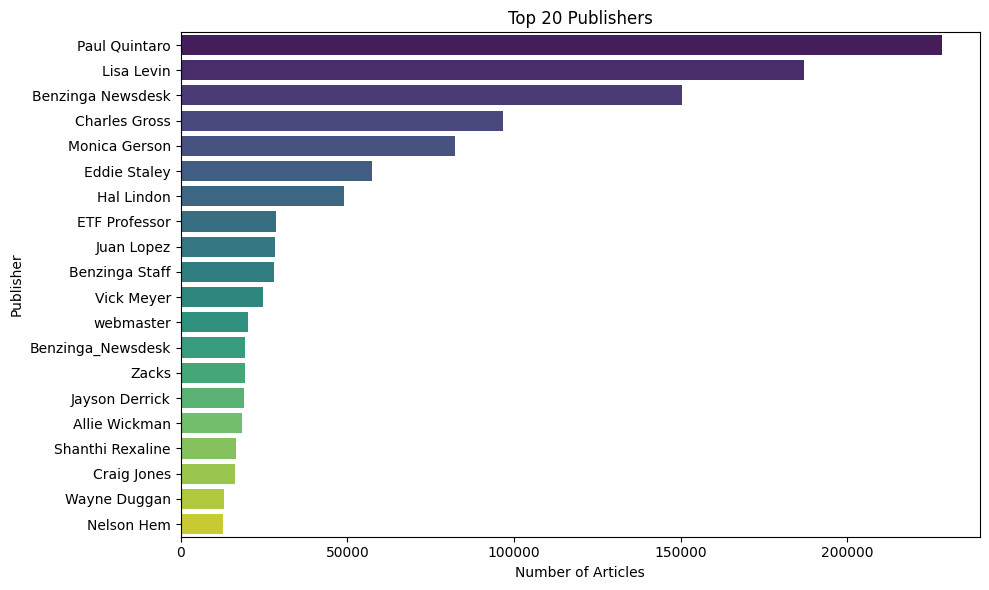

In [9]:
# Visualize top 20 publisher
top_publisher = publisher_counts.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publisher.values, y=top_publisher.index, palette="viridis")
plt.title("Top 20 Publishers")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

**Count Number of Stock**

In [10]:
stock_counts = sentimental_data["stock"].value_counts()
stock_counts.head(10)

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
Name: count, dtype: int64

**Visualize Stock**

C:\Users\liulj\AppData\Local\Temp\ipykernel_22604\202376184.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stock.values, y=top_stock.index, palette="viridis")


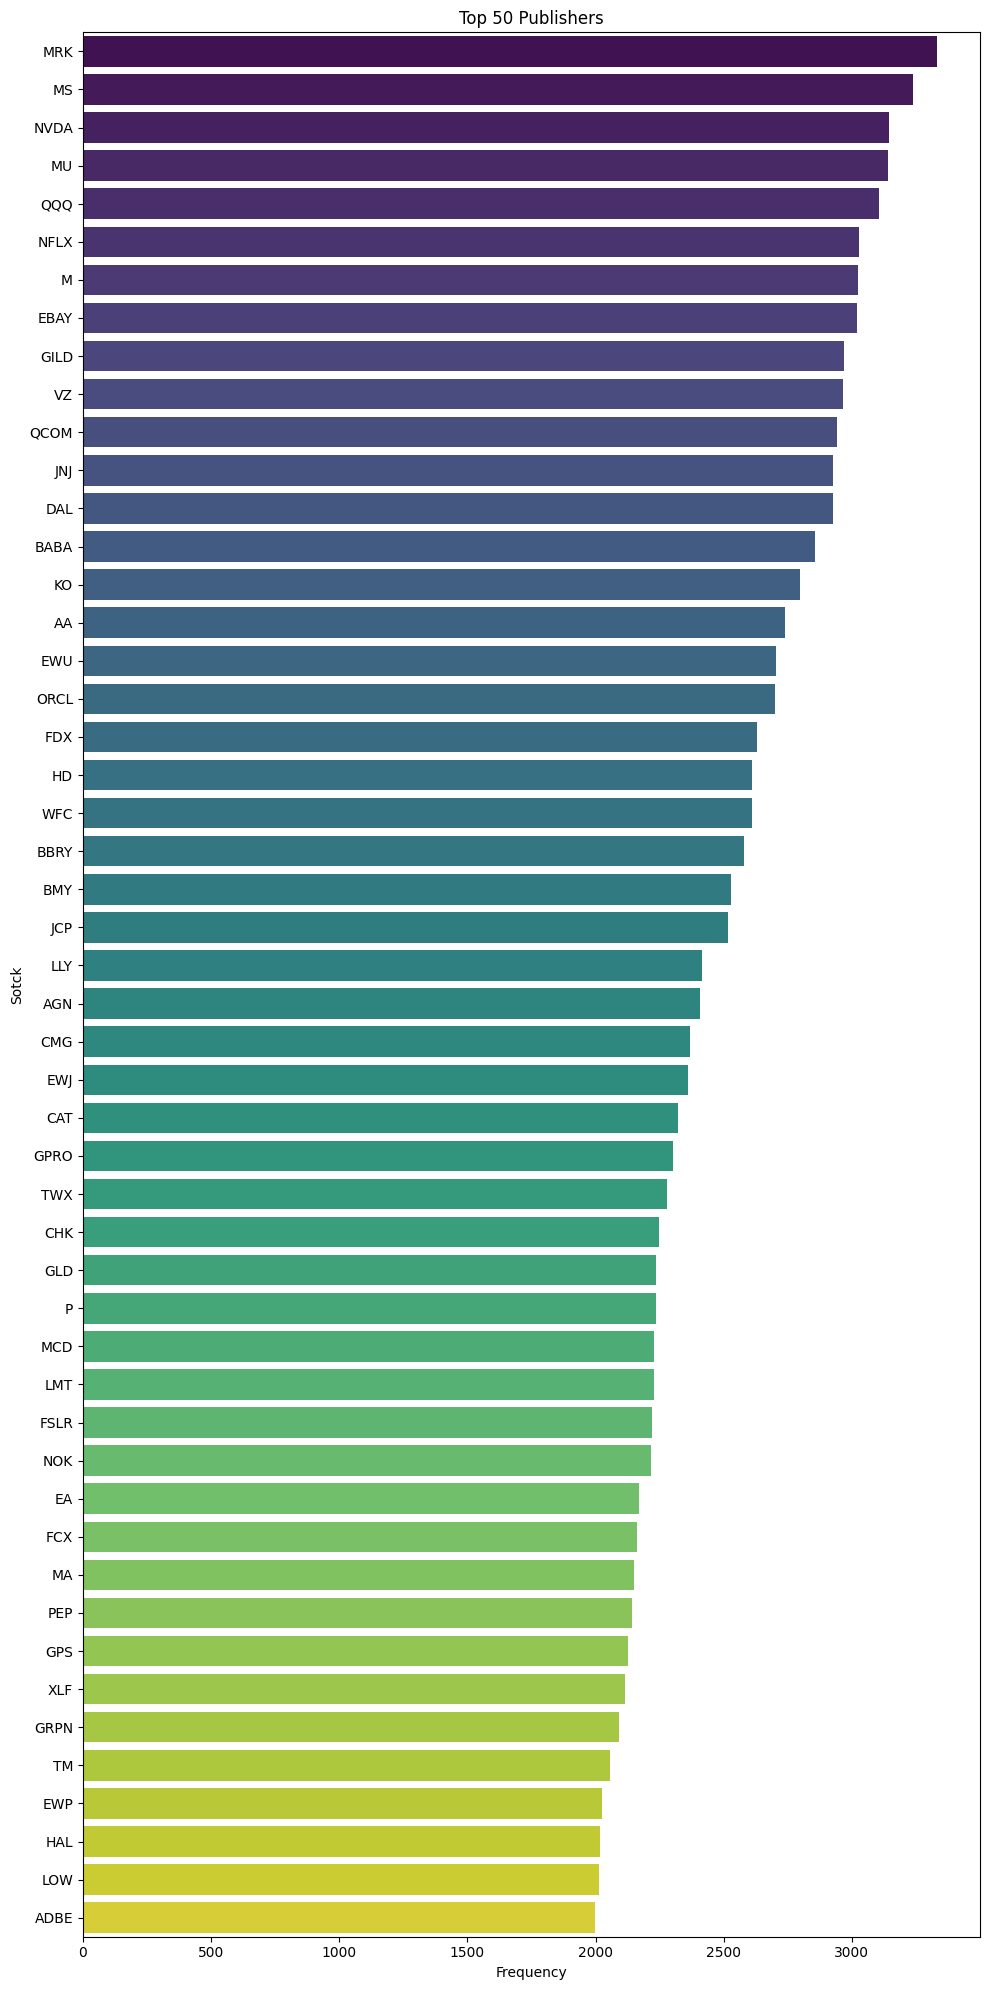

In [11]:
# Visualive top 50 stock
# Visualize top 50 publisher
top_stock = stock_counts.head(50)
plt.figure(figsize=(10, 20))
sns.barplot(x=top_stock.values, y=top_stock.index, palette="viridis")
plt.title("Top 50 Publishers")
plt.xlabel("Frequency")
plt.ylabel("Sotck")
plt.tight_layout()
plt.show()

**Date Trend Analysis**
* Analyze trends in publication dates and news frequency over time

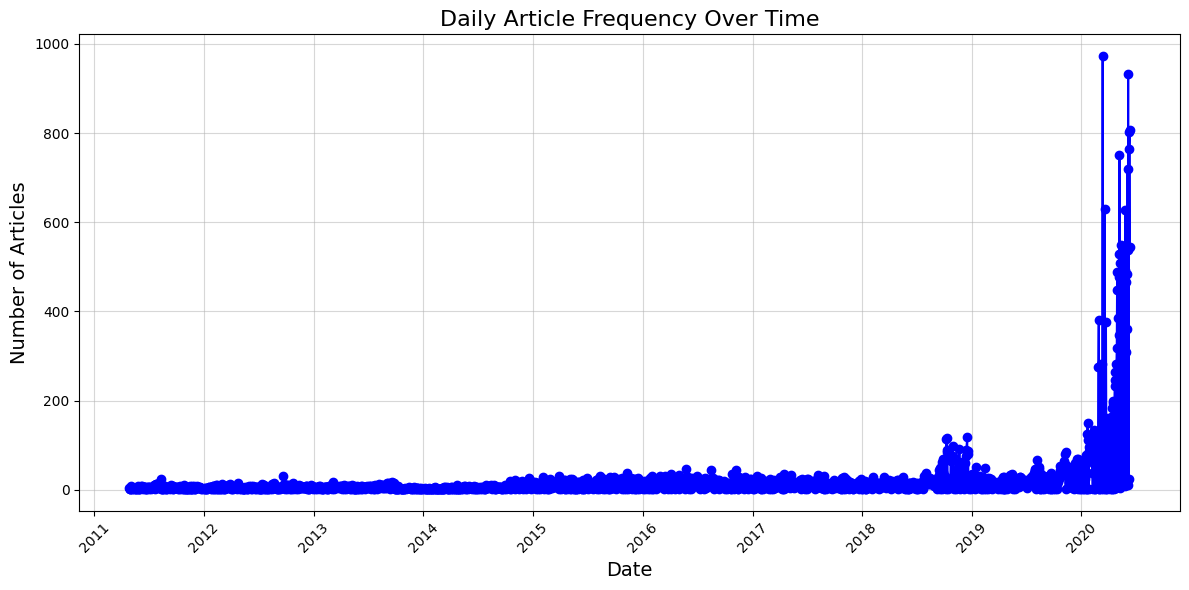

In [12]:
def data_trend_analysis(df):
    # Convert date to datetime format
    df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

    # Extract the date (ignoring time)
    df['publish_date'] = df['date'].dt.date

    # Aggregate to count the number of articles per day
    daily_trends = df.groupby('publish_date').size().reset_index(name='article_count')

    # Plot the trend
    plt.figure(figsize=(12, 6))
    plt.plot(daily_trends['publish_date'], daily_trends['article_count'], marker='o', linestyle='-', color='b')
    plt.title('Daily Article Frequency Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Articles', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

data_trend_analysis(sentimental_data)

### Sentiment analysis & Topic Modeling

**Sentiment Analysis Using `SentimentIntensityAnalyzer`**

In [13]:
# Sentiment Analysis
# Performs sentiment analysis on headlines.
sia = SentimentIntensityAnalyzer()
sentimental_data['sentiment'] = sentimental_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
sentimental_data['sentiment_category'] = pd.cut(sentimental_data['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

sentiment_counts = sentimental_data['sentiment_category'].value_counts()
print("\nSentiment Analysis Results:\n", sentiment_counts)



sentimental_data.head()


Sentiment Analysis Results:
 sentiment_category
Neutral     753395
Positive    435480
Negative    218453
Name: count, dtype: int64


,Unnamed: 0,headline,url,publisher,date,stock,publish_date,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020-06-05,0.000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020-06-03,0.000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020-05-26,0.000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,2020-05-22,0.000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,2020-05-22,0.296,Positive


C:\Users\liulj\AppData\Local\Temp\ipykernel_22604\450274976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentimental_data, x='sentiment_category', palette='coolwarm')


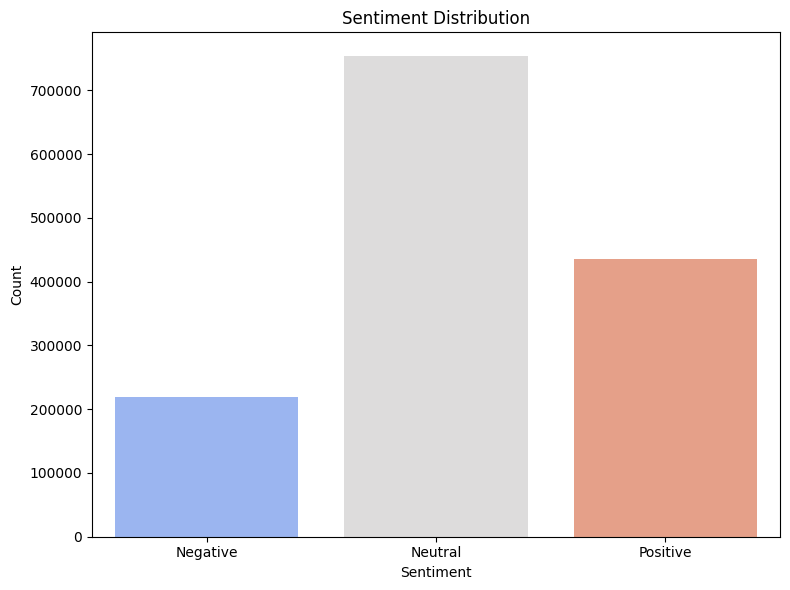

In [14]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=sentimental_data, x='sentiment_category', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Word Cloud**

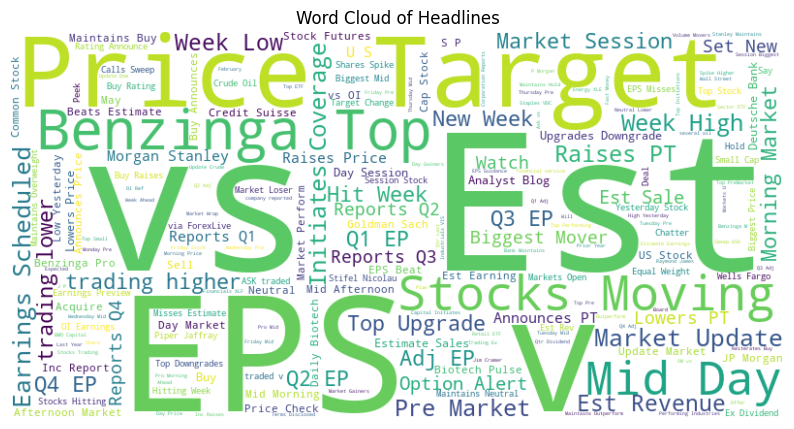

In [15]:
# Generate Word Cloud
def generate_wordcloud(df):
    """Generates a word cloud for the headlines."""
    text = ' '.join(df['headline'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Headlines")
    plt.show()

generate_wordcloud(sentimental_data)

### Time Series Analysis

Daily Article Publication Trend


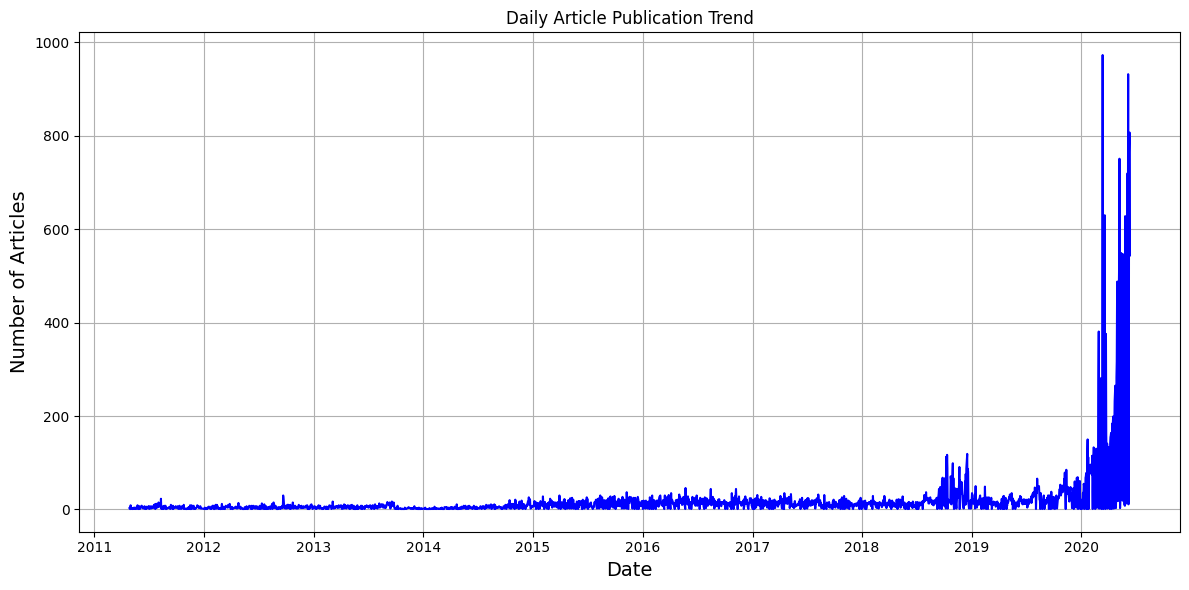

Hourly Article Distribution


C:\Users\liulj\AppData\Local\Temp\ipykernel_22604\3241104321.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_publication.index, y=hourly_publication.values, palette="viridis")


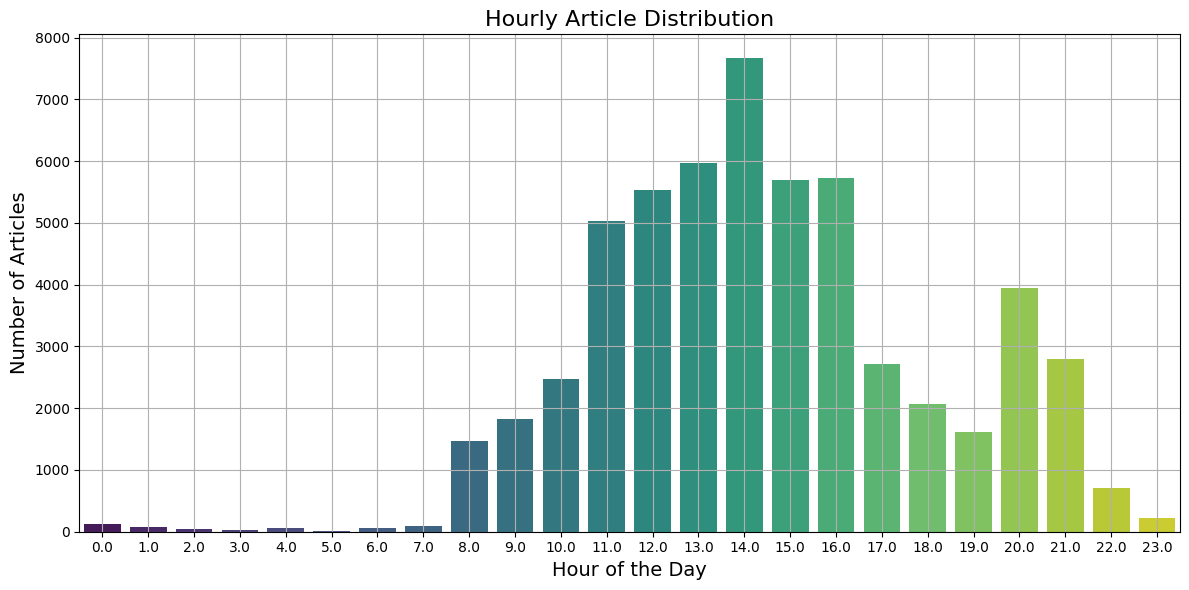

Weekly Article Distribution


C:\Users\liulj\AppData\Local\Temp\ipykernel_22604\3241104321.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_publication.index, y=weekly_publication.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")


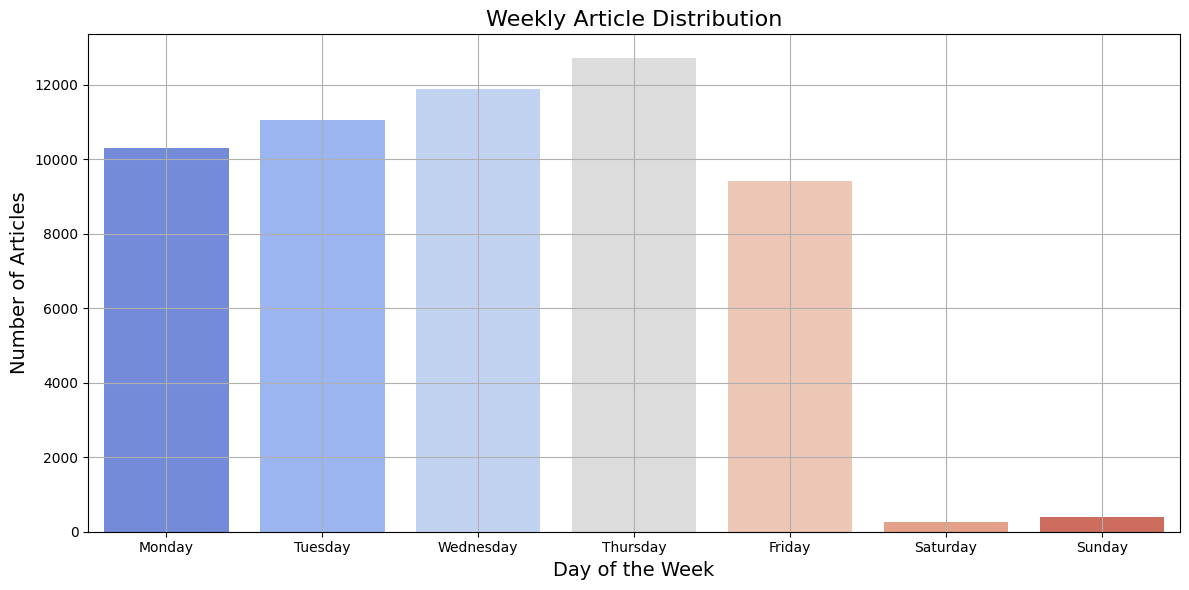

In [16]:
def article_publication_time_anaysis(data):
    # Convert date to datetime
    data['date'] = pd.to_datetime(data['date'], errors='coerce', utc=True)

    # Extract time-based features
    data['hour'] = data['date'].dt.hour
    data['day'] = data['date'].dt.day
    data['weekday'] = data['date'].dt.day_name()
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year

    # Grouping by time intervals
    daily_publication = data.groupby(data['date'].dt.date).size()
    hourly_publication = data.groupby(data['hour']).size()

    print("Daily Article Publication Trend")

    # Overall Trend: Daily publication count
    plt.figure(figsize=(12, 6))
    daily_publication.plot(title="Daily Article Publication Trend", color='blue')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Articles', fontsize=14)
    plt.grid()
    plt.tight_layout()
    plt.show()

    print("Hourly Article Distribution")

    # Hourly Distribution: When are most articles published?
    plt.figure(figsize=(12, 6))
    sns.barplot(x=hourly_publication.index, y=hourly_publication.values, palette="viridis")
    plt.title('Hourly Article Distribution', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=14)
    plt.ylabel('Number of Articles', fontsize=14)
    plt.grid()
    plt.tight_layout()
    plt.show()

    print("Weekly Article Distribution")

    # Weekly Patterns: Day of the week
    weekly_publication = data.groupby('weekday').size()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=weekly_publication.index, y=weekly_publication.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")
    plt.title('Weekly Article Distribution', fontsize=16)
    plt.xlabel('Day of the Week', fontsize=14)
    plt.ylabel('Number of Articles', fontsize=14)
    plt.grid()
    plt.tight_layout()
    plt.show()


article_publication_time_anaysis(sentimental_data)